# IEEE Coders Week
### Day 3 : Classification (Supervised Learning)
#### By : Fahmi Jabbar (rootmawar77@gmail.com)
---
**Disclaimer**

All of the work result below is done by me, based on every resources that have been given. Please contact me if you have any good suggestion.


# Data Preparation & Pre-Processing

In [1]:
#@title Import Important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from matplotlib.colors import ListedColormap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#@title Import dataset from corresponding URL
!wget --no-check-certificate \
http://iali.in/datasets/mushrooms.csv \
  -O /content/mushrooms.csv

--2020-06-03 15:01:35--  http://iali.in/datasets/mushrooms.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘/content/mushrooms.csv’

/content/mushrooms. 100%[===================>] 365.24K  1.16MB/s    in 0.3s    

2020-06-03 15:01:35 (1.16 MB/s) - ‘/content/mushrooms.csv’ saved [374003/374003]



In [3]:
#@title Dataset Information
print("Visualizing the table")
df = pd.read_csv('/content/mushrooms.csv')
df.head()

Visualizing the table


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


We can conclude that the data is fully in text and without null objects.

In order to be processed into ML, data needed to be turned into value integer

In [6]:
#@title Label Encoder & Preview
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


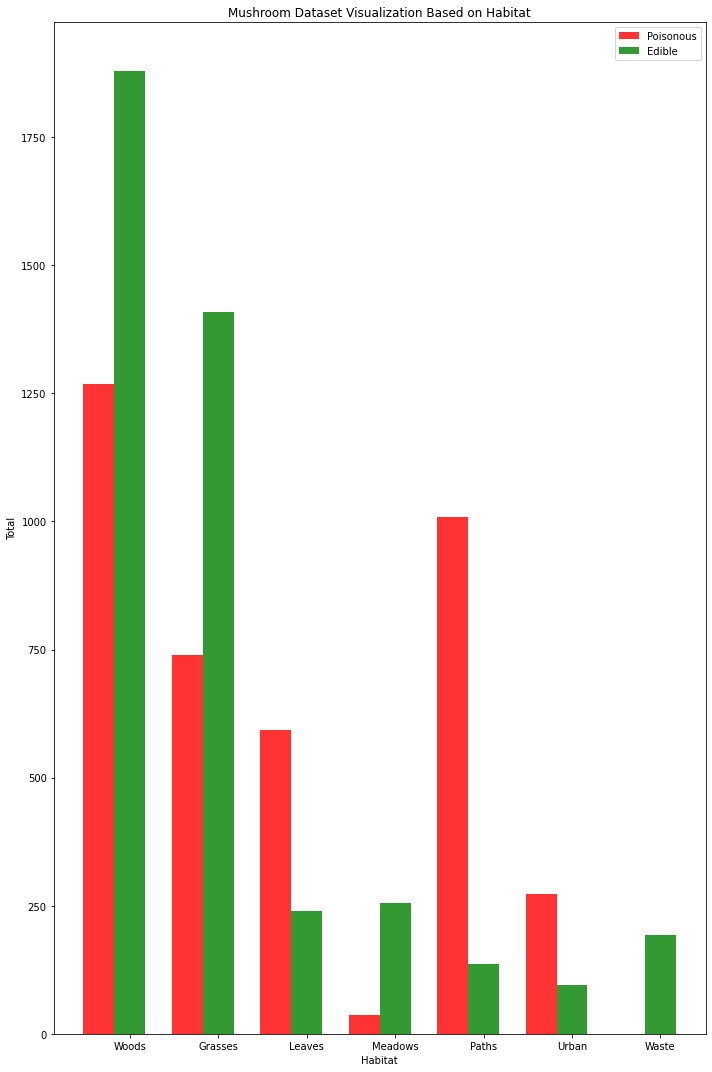

In [7]:
#@title Visualizing Dataset. Based on Habitat { vertical-output: true }
look_class = df['class'].to_numpy()
look_habitat = df['habitat'].to_numpy()

habitat1 = df[(df['class'] == 1) & (df['habitat'] == 0)]
habitat2 = df[(df['class'] == 0) & (df['habitat'] == 0)]
habitat3 = df[(df['class'] == 1) & (df['habitat'] == 1)]
habitat4 = df[(df['class'] == 0) & (df['habitat'] == 1)]
habitat5 = df[(df['class'] == 1) & (df['habitat'] == 2)]
habitat6 = df[(df['class'] == 0) & (df['habitat'] == 2)]
habitat7 = df[(df['class'] == 1) & (df['habitat'] == 3)]
habitat8 = df[(df['class'] == 0) & (df['habitat'] == 3)]
habitat9 = df[(df['class'] == 1) & (df['habitat'] == 4)]
habitat10 = df[(df['class'] == 0) & (df['habitat'] == 4)]
habitat11 = df[(df['class'] == 1) & (df['habitat'] == 5)]
habitat12 = df[(df['class'] == 0) & (df['habitat'] == 5)]
habitat13 = df[(df['class'] == 1) & (df['habitat'] == 6)]
habitat14 = df[(df['class'] == 0) & (df['habitat'] == 6)]

class1 = []
class0 = []

class1.append(habitat1['class'].count())
class0.append(habitat2['class'].count())
class1.append(habitat3['class'].count())
class0.append(habitat4['class'].count())
class1.append(habitat5['class'].count())
class0.append(habitat6['class'].count())
class1.append(habitat7['class'].count())
class0.append(habitat8['class'].count())
class1.append(habitat9['class'].count())
class0.append(habitat10['class'].count())
class1.append(habitat11['class'].count())
class0.append(habitat12['class'].count())
class1.append(habitat13['class'].count())
class0.append(habitat14['class'].count())

index = np.arange(7)
bar_width = 0.35
opacity = 0.8

plt.figure(figsize=(10,15))
rects1 = plt.bar(index, class1, bar_width,
alpha=opacity,
color='r',
label='Poisonous')

rects2 = plt.bar(index + bar_width, class0, bar_width,
alpha=opacity,
color='g',
label='Edible')

plt.xlabel('Habitat')
plt.ylabel('Total')
plt.title('Mushroom Dataset Visualization Based on Habitat')
plt.xticks(index + bar_width, ("Woods", "Grasses", "Leaves", "Meadows", "Paths", "Urban", "Waste"))
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
#@title Split data to Training set & Validation set

X = df.iloc[:,1:23].values #select the features but classes
Y = df.iloc[:,0].values #select classes
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating Model & Result (Decision Tree)

In [9]:
#@title Training Model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
#@title Comparison between prediction on test set and test set 
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
print("We're unlikely to see all of the comparison due to the size of the test set")

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
We're unlikely to see all of the comparison due to the size of the test set


In [11]:
#@title Result Details
# Conclude that 0 is Edible and 1 is vice versa
labels = ["Edible", "Poisonous"]

report = classification_report(y_test, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       852
   Poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



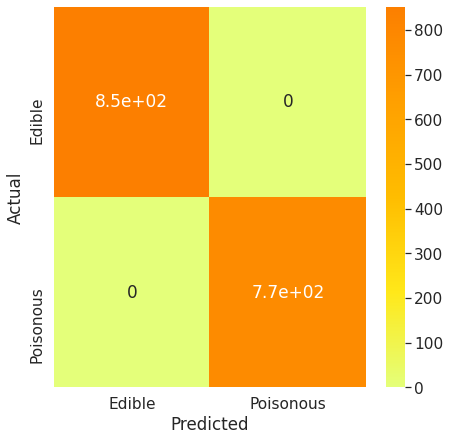

In [12]:
#@title Confusion Matrix Visualization


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

Correct answer (by model) = 1625
Incorrect answer (by model) = 0
Decission Tree accuracy: 100.0 %


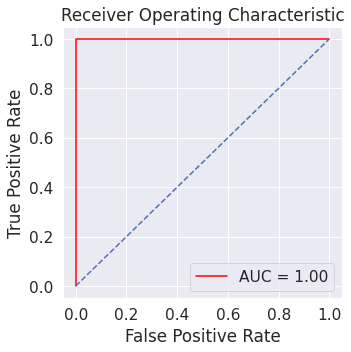

In [13]:
#@title Result Visualization { vertical-output: true }
cm = confusion_matrix(y_pred, y_test)
correct_answer = cm[0][0] + cm [1][1]
incorrect_answer = cm[0][1] + cm[1][0]


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print("Correct answer (by model) = " + str(correct_answer))
print("Incorrect answer (by model) = " + str(incorrect_answer))
print('Decission Tree accuracy:', accuracy_score(y_test, y_pred)*100 ,"%")

# Creating Model & Result (Random Forest)

In [14]:
#@title Training Model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
#@title Comparison between prediction on test set and test set 
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
print("We're unlikely to see all of the comparison due to the size of the test set")

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
We're unlikely to see all of the comparison due to the size of the test set


In [16]:
#@title Result Details
# Conclude that 0 is Edible and 1 is vice versa
labels = ["Edible", "Poisonous"]

report = classification_report(y_test, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       852
   Poisonous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



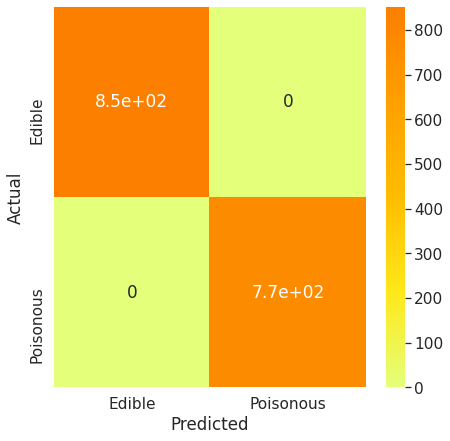

In [17]:
#@title Confusion Matrix Visualization

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

Correct answer (by model) = 1625
Incorrect answer (by model) = 0
Random Forest accuracy: 100.0 %


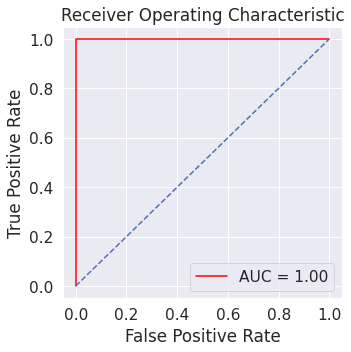

In [18]:
#@title Result Visualization { vertical-output: true }
cm = confusion_matrix(y_pred, y_test)
correct_answer = cm[0][0] + cm [1][1]
incorrect_answer = cm[0][1] + cm[1][0]


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print("Correct answer (by model) = " + str(correct_answer))
print("Incorrect answer (by model) = " + str(incorrect_answer))
print('Random Forest accuracy:', accuracy_score(y_test, y_pred)*100 ,"%")

# Creating Model & Result (Logistic Regression)

In [19]:
#@title Training Model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#@title Comparison between prediction on test set and test set 
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
print("We're unlikely to see all of the comparison due to the size of the test set")

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]
We're unlikely to see all of the comparison due to the size of the test set


In [21]:
#@title Result Details
# Conclude that 0 is Edible and 1 is vice versa
labels = ["Edible", "Poisonous"]

report = classification_report(y_test, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

      Edible       0.95      0.96      0.96       852
   Poisonous       0.96      0.95      0.95       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



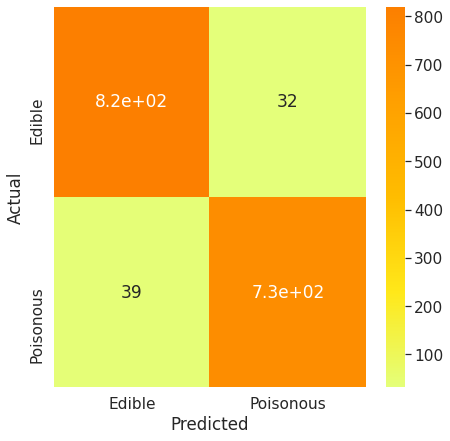

In [22]:
#@title Confusion Matrix Visualization

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

Correct answer (by model) = 1554
Incorrect answer (by model) = 71
Logistic Regression accuracy: 95.63076923076923 %


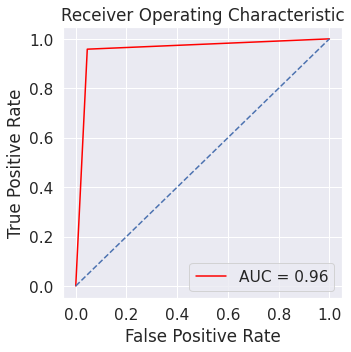

In [23]:
#@title Result Visualization { vertical-output: true }
cm = confusion_matrix(y_pred, y_test)
correct_answer = cm[0][0] + cm [1][1]
incorrect_answer = cm[0][1] + cm[1][0]


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

print("Correct answer (by model) = " + str(correct_answer))
print("Incorrect answer (by model) = " + str(incorrect_answer))
print('Logistic Regression accuracy:', accuracy_score(y_test, y_pred)*100 ,"%")